<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/%C4%90ieu_khien_dong_c%C6%A1_dc_10_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Điều khiển động cơ DC 
# Nhiệt độ : input + set point (18 - 30)
#                  + VAL sensor ( 5 - 60)
#           output + pwm(0-255)
# Độ ẩm
# Lưu lượng
# Mức


In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1a3a6b943033511187d33b96e67a6ec121518d9114806f2504e71d57366d5f02
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-8-4fcb31f5fde1>:50: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-8-4fcb31f5fde1>:51: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-8-4fcb31f5fde1>:52: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


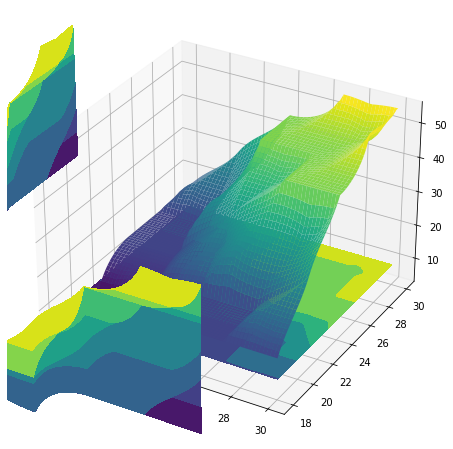

In [ ]:
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

from networkx.algorithms.bipartite import projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
universe = np.linspace(18,30,61)
universe1 = np.linspace(0,60,61)
SETPOINT  = ctrl.Antecedent(universe,'SETPOINT')
VAL_SENSOR = ctrl.Antecedent(universe,'VAL_SENSOR')
PWM = ctrl.Consequent(universe1,'PWM')

name = ['Very Low','Low','Average','High','Very High']
SETPOINT.automf(names=name)
VAL_SENSOR.automf(names =name)
PWM.automf(names = name)

#SETPOINT.view()
#VAL_SENSOR.view()

rule1 = ctrl.Rule(antecedent=((SETPOINT['Very Low']&VAL_SENSOR['Very Low'])|(SETPOINT['Low']&VAL_SENSOR['Very Low'])|(SETPOINT['Low']&VAL_SENSOR['Low'])|(SETPOINT['Very Low']&VAL_SENSOR['Low'])),consequent=PWM['Very Low'],label='rule VP')
rule2 = ctrl.Rule(antecedent=((SETPOINT['Very Low']&VAL_SENSOR['Average'])|(SETPOINT['Very Low']&VAL_SENSOR['High'])|(SETPOINT['Very Low']&VAL_SENSOR['Very High'])|(SETPOINT['Low']&VAL_SENSOR['Average']|(SETPOINT['Low']&VAL_SENSOR['High'])|(SETPOINT['Average']&VAL_SENSOR['Very Low'])|(SETPOINT['Average']&VAL_SENSOR['Low'])
|(SETPOINT['High']&VAL_SENSOR['Very Low'])|(SETPOINT['High']&VAL_SENSOR['Low'])|(SETPOINT['Very High']&VAL_SENSOR['Very Low']))),consequent=PWM['Low'],label='rule P')
rule3 = ctrl.Rule(antecedent=((SETPOINT['Low']&VAL_SENSOR['Very High'])|(SETPOINT['Average']&VAL_SENSOR['Average'])|(SETPOINT['Very High']&VAL_SENSOR['Low'])),consequent=PWM['Average'],label='rule A')
rule4 = ctrl.Rule(antecedent=((SETPOINT['Average']&VAL_SENSOR['High'])|(SETPOINT['Average']&VAL_SENSOR['Very High'])|(SETPOINT['High']&VAL_SENSOR['Average'])|(SETPOINT['High']&VAL_SENSOR['High'])|(SETPOINT['Very High']&VAL_SENSOR['Average'])),consequent=PWM['High'],label='rule G')
rule5 = ctrl.Rule(antecedent=((SETPOINT['High']&VAL_SENSOR['Very High'])|(SETPOINT['Very High']&VAL_SENSOR['High'])|(SETPOINT['Very High']&VAL_SENSOR['Very High'])),consequent=PWM['Very High'],label='rule VG')

PWMping_ctrl= ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5])
sim= ctrl.ControlSystemSimulation(PWMping_ctrl,flush_after_run=61*61+1)
upsampled = np.linspace(18,30,61)
upsampled1 = np.linspace(0,60,61)

x,y = np.meshgrid(upsampled,upsampled)

z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['SETPOINT']=x[i,j]
    sim.input ['VAL_SENSOR']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['PWM']

fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111,projection='3d')

suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)

ax.view_init(30,300)

